# Matplotlib - plotting in Python

### Ondrej Lexa

## Introduction

Data and model results can be abstract if we can't see how they look. Also, it is easy to get too removed from  calculations and end up with answers that don't make sense. A straight-forward way to investigate information and to have a reality check is by plotting it up. Here we will cover the basics for making a variety of commonly-used plots.

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for LaTeX formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance.

Matplotlib provides a [gallery](http://matplotlib.org/gallery.html) of plot examples, as described by text and shown as plots. This is really helpful for finding what you want to do when you don't know how to describe it, and to get ideas for what possibilities are out there.

To produce figures inline in Jupyter notebooks, you need to run the command `%pylab inline` for interactive MATLAB-like interface or `%matplotlib inline` for matplotlib object-oriented API, whem more sofisticated figures are needed.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The scaling of the figure for figures with `%matplotlib inline` depends on the `figure.dpi` parameter. So if your figures are to small and you do not want to increase the `figsize` then you can just set:

In [2]:
# mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['figure.dpi'] = 150

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB. To use this API from matplotlib, we need to include the symbols in the `pylab` module:

### Example

A simple figure with MATLAB-like plotting API:

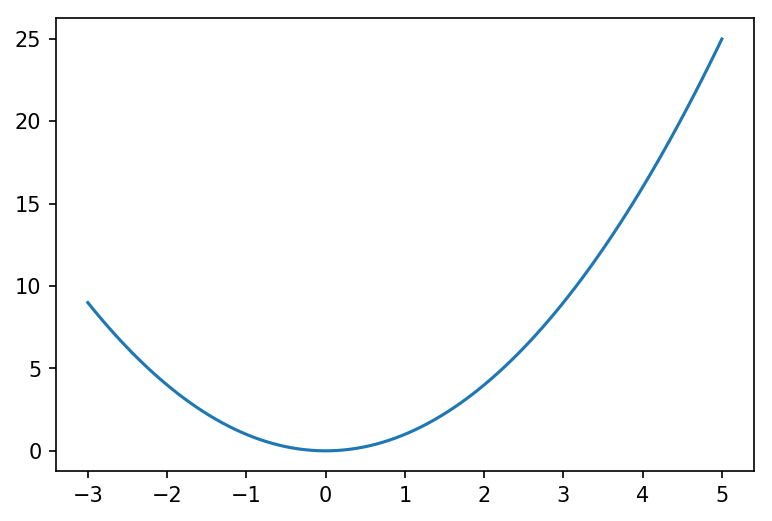

In [3]:
x = linspace(-3, 5, 100)
plot(x, x**2);

You can alter the plot with color/symbol selection or commands like `xlabel`, `ylabel`, `title`, `legend` etc. which act on the active figure, but you can only reference one figure/axes at a time when they are not named.

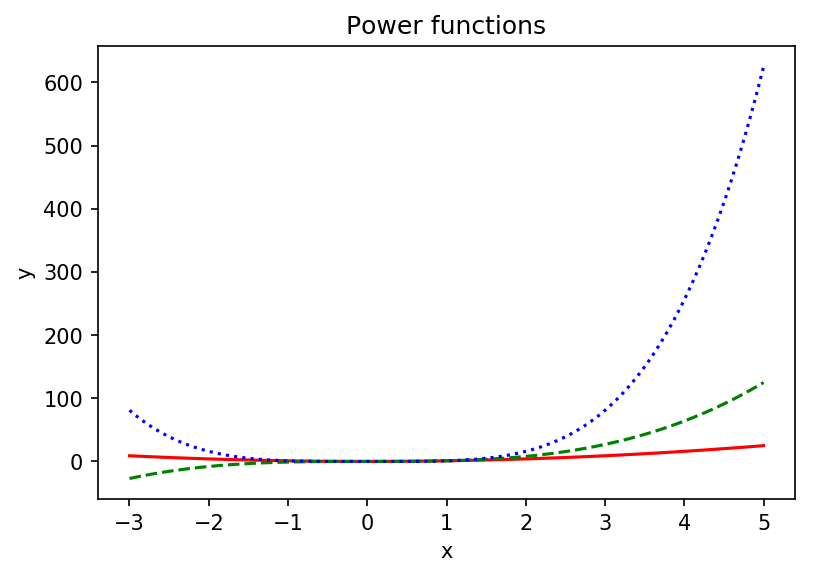

In [4]:
plot(x, x**2, 'r')
plot(x, x**3, 'g--')
plot(x, x**4, 'b:')
xlabel('x')
ylabel('y')
title('Power functions');

You can define size by `figsize` argument of `figure` command and/or divide figure to several axes using `subplot` command

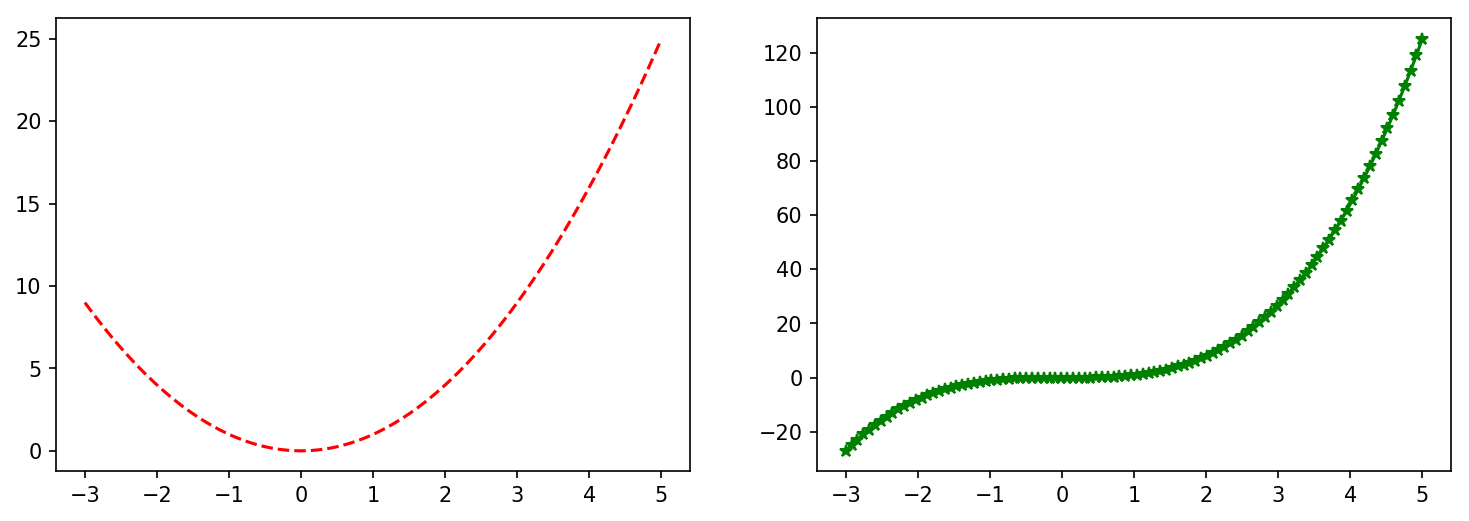

In [5]:
figure(figsize=(12,4))
subplot(1,2,1)
plot(x, x**2, 'r--')
subplot(1,2,2)
plot(x, x**3, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures. So, don't screw over future you! Set up your plot properly from the beginning using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

## A. Figure overview

A `Figure` in matplotlib has several basic pieces, as shown in the following image. Note that `axes` refers to the area within a figure that is used for plotting and `axis` refers to a single x- and y-axis.

![fig](http://matplotlib.org/_images/fig_map.png)

### Figure and axes setup

Steps for setting up a figure:

1. Open a figure, save the object to a variable, and size it as desired.
2. Add axes to the figure. Axes are the objects in which data is actually plotted.
3. Add labels to clearly explain the plot, such as axis labels and a title.
4. Plot! Most basically, use the `plot` command to plot lines and markers.

Here is a good way to set up a general figure so that you can easily work with it:

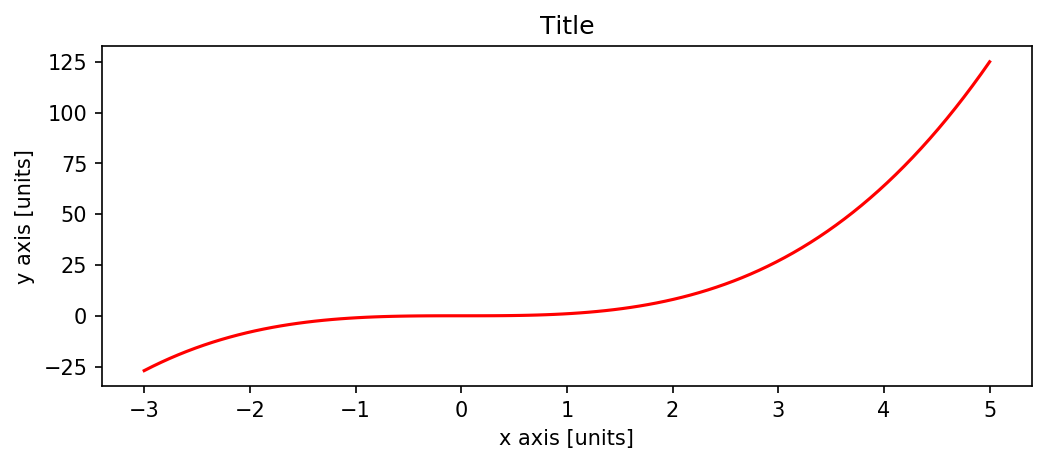

In [6]:
fig = plt.figure(figsize=(8, 3))  # figure size is given as a (width, height) tuple
ax = fig.add_subplot(111)
# alternatively you can add axes to given position within figure
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax.set_xlabel('x axis [units]')
ax.set_ylabel('y axis [units]')
ax.set_title('Title')
ax.plot(x, x**3, 'r');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

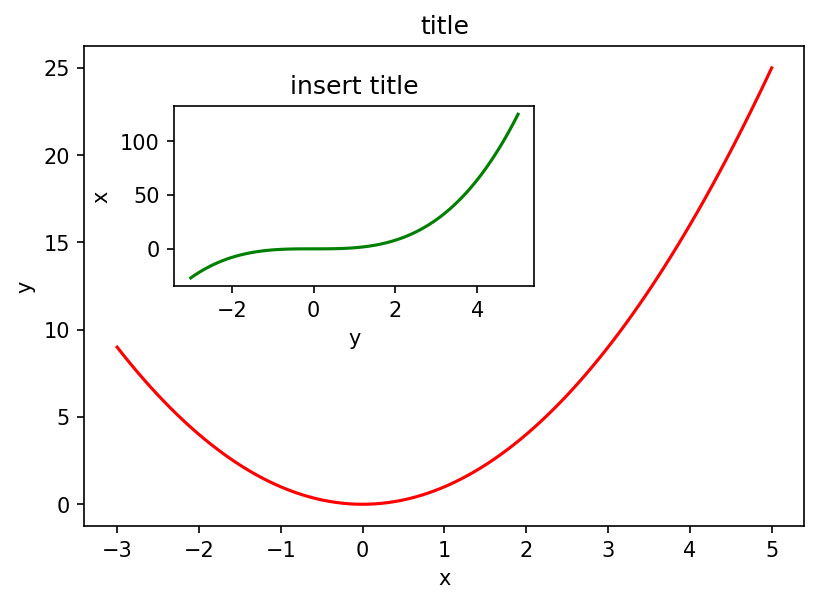

In [7]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
ax1.plot(x, x**2, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

# insert
ax2.plot(x, x**3, 'g')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

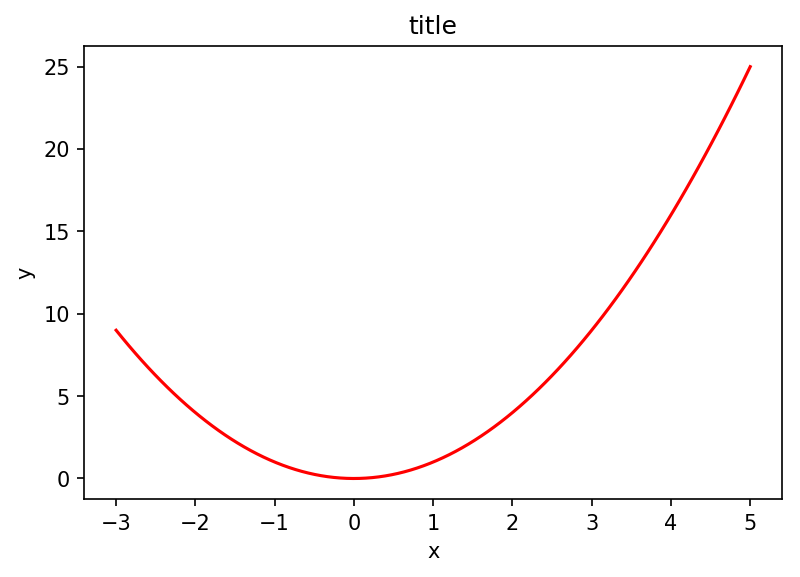

In [8]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

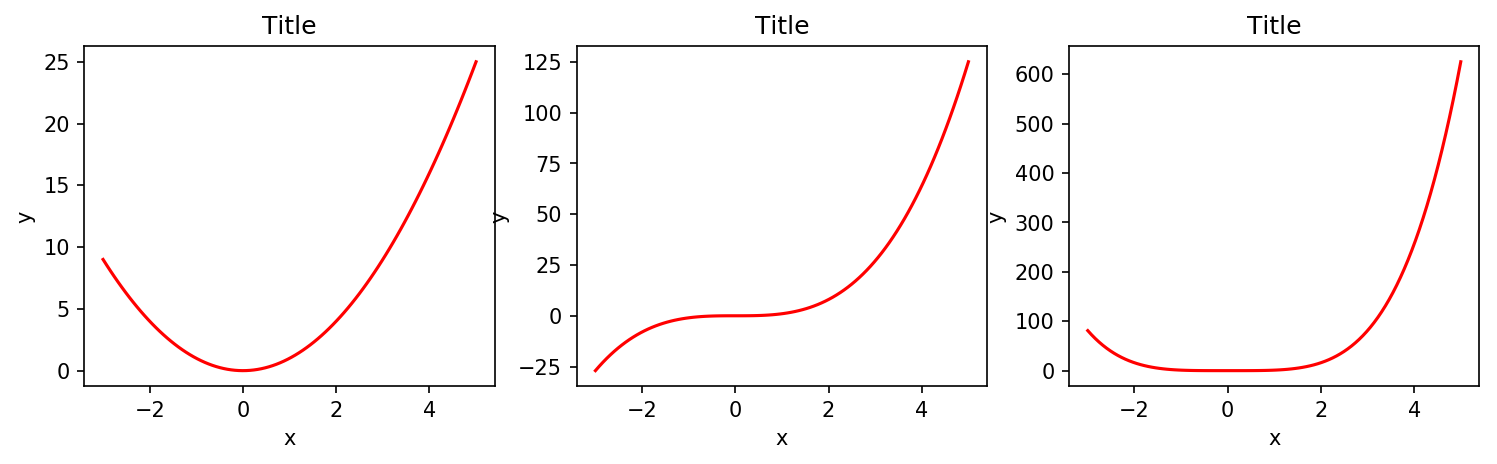

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for p, ax in enumerate(axes):
    ax.plot(x, x**(p+2), 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Title')
#fig.tight_layout()

That was easy, but it isn't so pretty with overlapping figure axes and labels, right? We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content. Try to uncomment it and evaluate cell again.

## Useful commands and keyword arguments

These commands and keyword arguments should be frequently used to customize and properly label your figures. Command syntax shown is common usage, not all available options.

### labels and text

`ax.set_xlabel(xlabel, fontsize, color)`, `ax.set_ylabel(ylabel, fontsize, color)`: Label the x and y axis with strings xlabel and ylabel, respectively. This is where you should state what is being plotted, and also give units.

`ax.set_title(Title, fontsize, color)`: Label the top of the axes with a title describing the plot.

`fig.suptitle(Suptitle, fontsize, color)`: Label the overall figure, above any subplot titles.

`ax.text(x, y, text, color, transform=ax.transAxes)`: Write text in your axes. The text will appear at location (x,y) in data coordinates — often it is easier to input the location in units of the axes itself (from 0 to 1), which is done by setting transform=ax.transAxes. The text is input as a string and `color` controls the color of the text.

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:

`plt.figure(figsize=(8,4), dpi=100)`: The same arguments can also be passed to layout managers, such as the subplots function.

The same arguments can also be passed to layout managers, such as the `subplots` function:

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class.

`fig.savefig("filename.svg")` or specifying format and DPI `fig.savefig("filename.png", dpi=200)`

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### Legends

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves

`ax.legend(["curve1", "curve2", "curve3"])` this method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

```python
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend()
```
The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. Some of the most common `loc` values are

|    string    | code|
|:------------:|:---:|
|    ‘best’    |  0  |
|‘upper right’ |  1  |
| ‘upper left’ |  2  |
| ‘lower left’ |  3  |
|‘lower right’ |  4  |
|  ‘right’     |  5  |
|‘center left’ |  6  |
|‘center right’|  7  |
|‘lower center’|  8  |
|‘upper center’|  9  |
|   ‘center’   |  10 |


The following figure shows how to use the figure title, axis labels and legends described above:

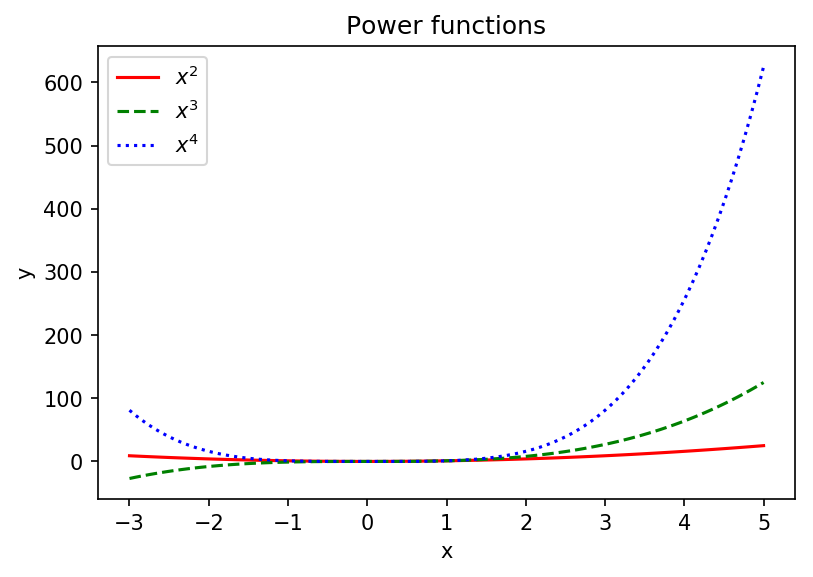

In [10]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'r', label='$x^2$')
ax.plot(x, x**3, 'g--', label='$x^3$')
ax.plot(x, x**4, 'b:', label='$x^4$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Power functions')
ax.legend(loc=2);

### Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

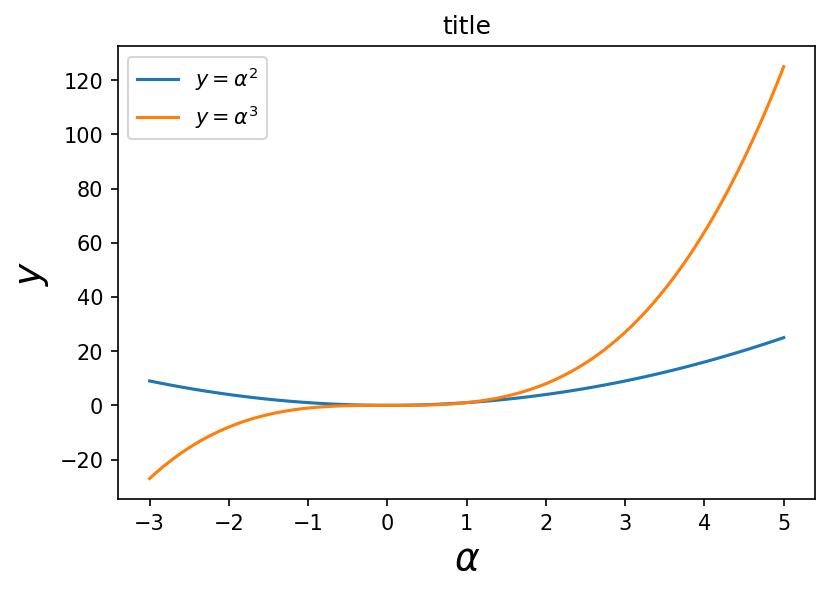

In [11]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. while line styles are also supported: for example, 'b.-' means a blue line with dots.

A handful of colors are available by a single letter code:
- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white, 

We can also define colors by their (html) names:

![color chart](http://i.stack.imgur.com/k2VzI.png)

Other inputs to matplotlib possible:

* Gray scale: a string with a float in it between 0 (black) and 1 (white)
* Hex: '#eeefff'
* RGB tuple in the range [0,1]: [0.1, 0.2, 0.3]

Optionally provide an alpha value using the color and alpha keyword arguments.

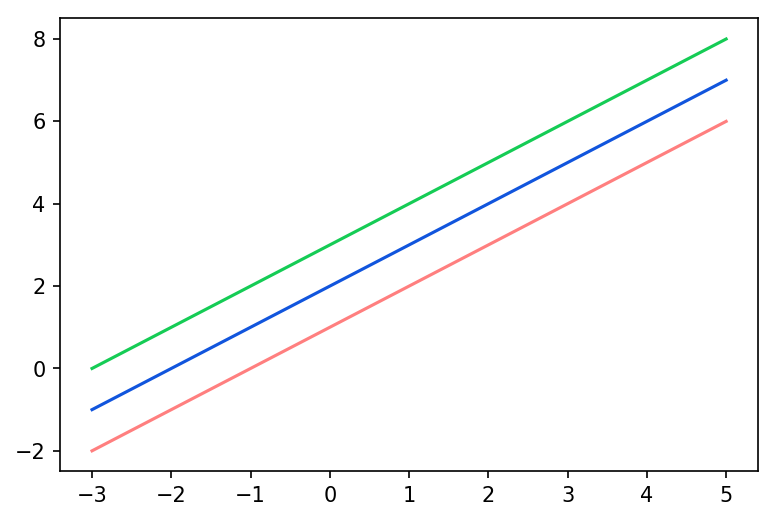

In [12]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

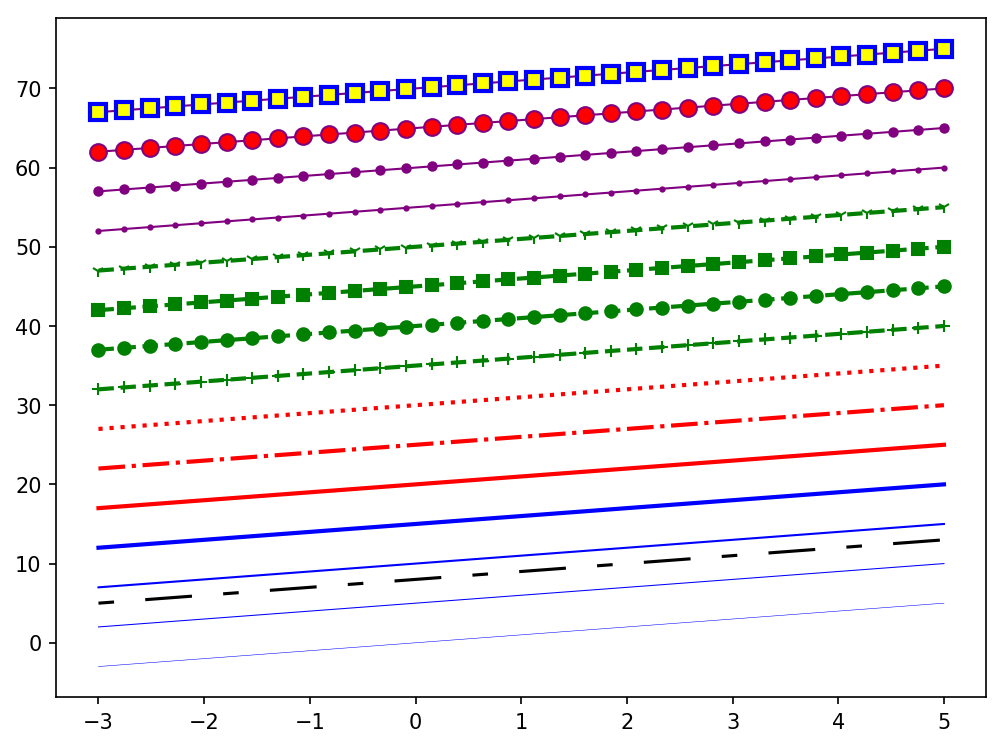

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
X = x[::3]
ax.plot(X, X, color="blue", linewidth=0.25)
ax.plot(X, X+5, color="blue", linewidth=0.50)
ax.plot(X, X+10, color="blue", linewidth=1.00)
ax.plot(X, X+15, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(X, X+20, color="red", lw=2, linestyle='-')
ax.plot(X, X+25, color="red", lw=2, ls='-.')
ax.plot(X, X+30, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(X, X+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(X, X+35, color="green", lw=2, ls='--', marker='+')
ax.plot(X, X+40, color="green", lw=2, ls='--', marker='o')
ax.plot(X, X+45, color="green", lw=2, ls='--', marker='s')
ax.plot(X, X+50, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(X, X+55, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(X, X+60, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(X, X+65, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(X, X+70, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `autoscale(tight=True)` for automatrically getting "tightly fitted" axes ranges:

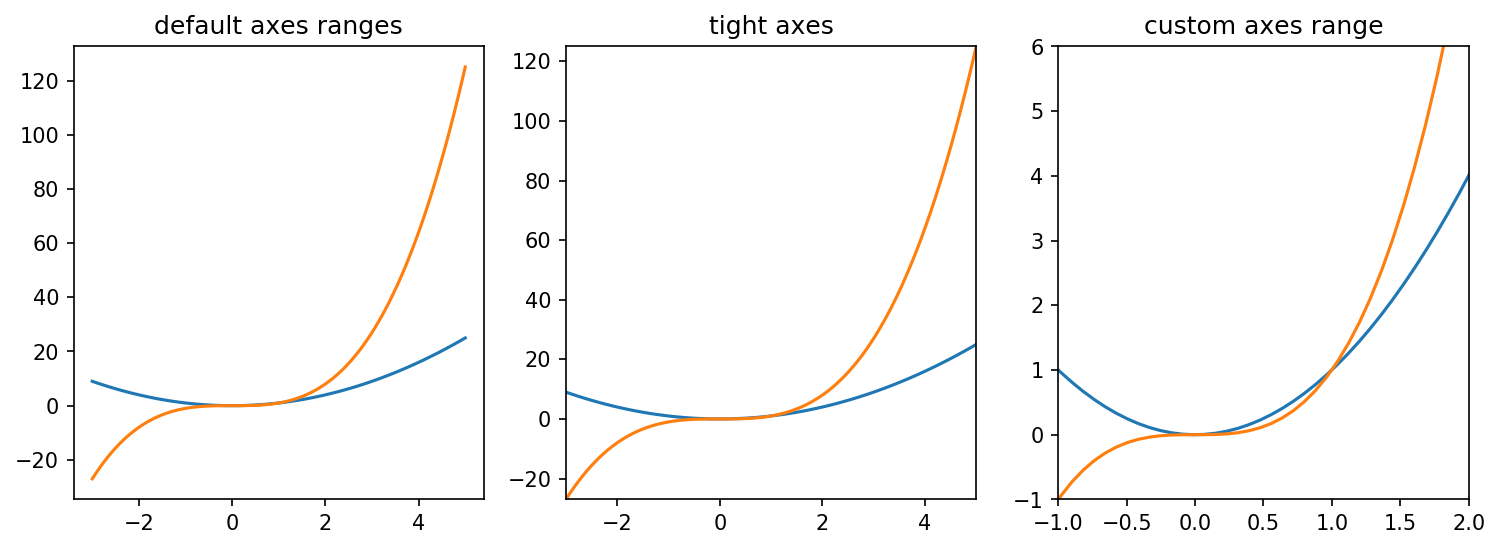

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].autoscale(tight=True)
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([-1, 6])
axes[2].set_xlim([-1, 2])
axes[2].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

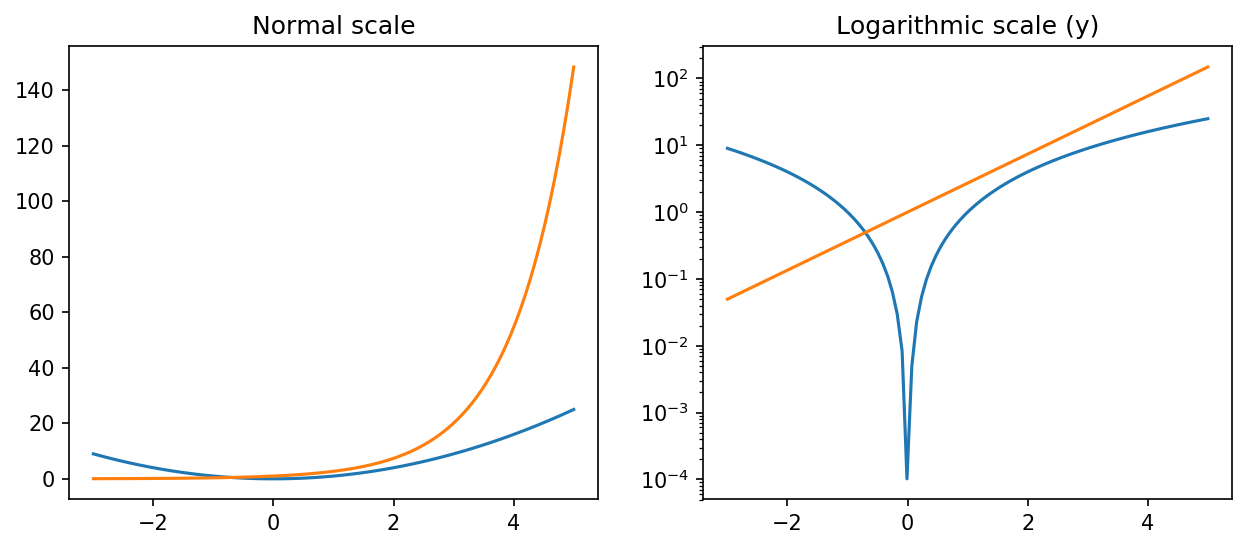

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

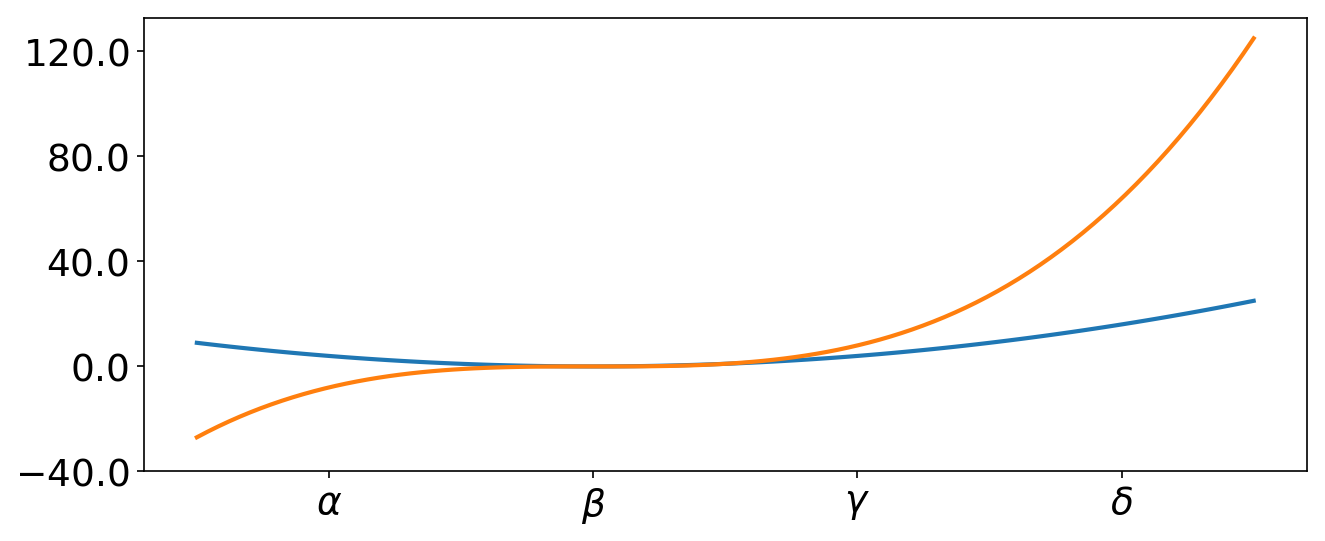

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([-2, 0, 2, 4])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$'], fontsize=18)

yticks = [-40, 0, 40, 80, 120]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

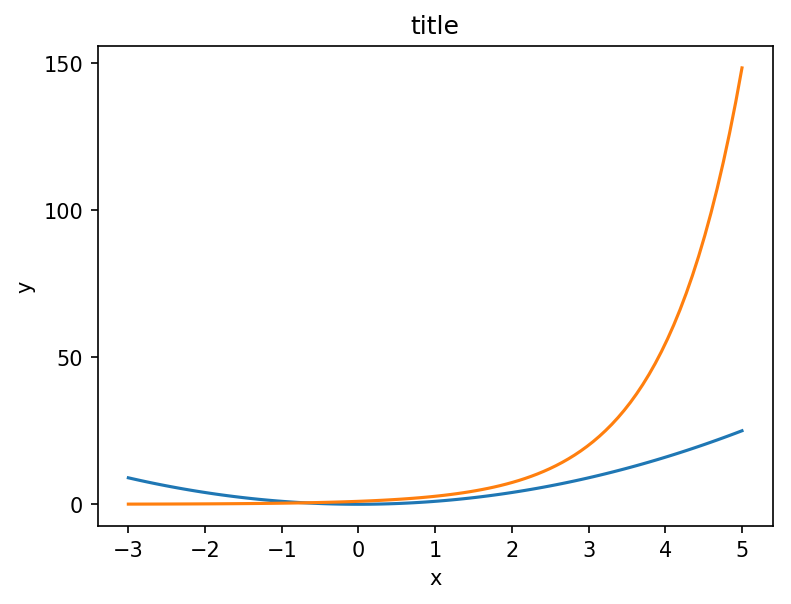

In [17]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

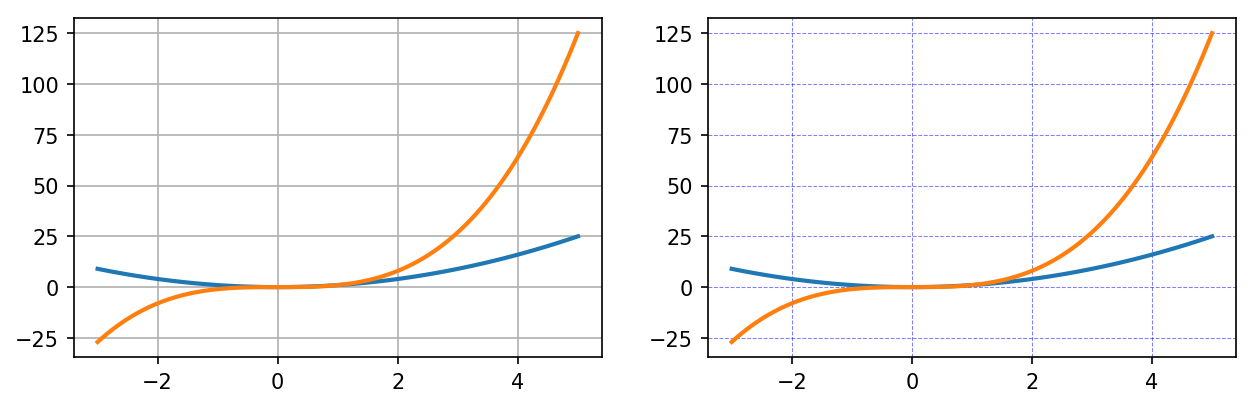

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

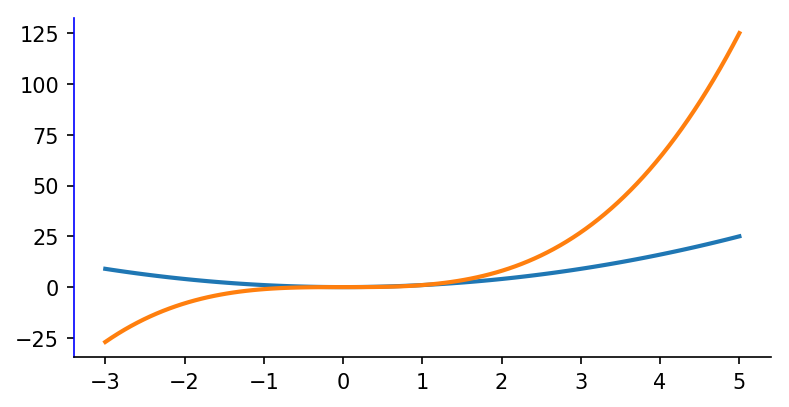

In [19]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(x, x**2, x, x**3, lw=2)

ax.spines['left'].set_color('blue')

# turn off axis spine to top and right
ax.spines['top'].set_color("none")
ax.spines['right'].set_color("none")
# only ticks on the left and bottom side
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

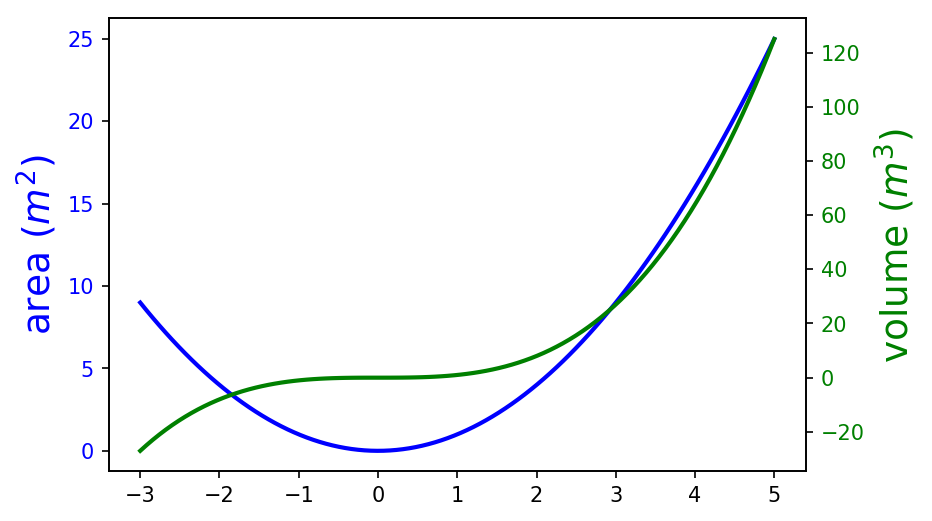

In [20]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="green")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="green")
for label in ax2.get_yticklabels():
    label.set_color("green")

### Axes where x and y is zero

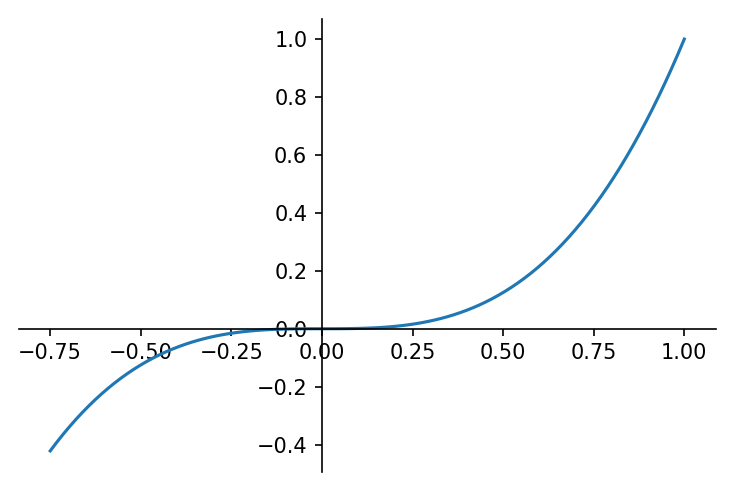

In [21]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Exercise
Let's plot historical temperature data measured at Prague Clementinum from 1st January 2000.

In [22]:
!head clementinum.csv

year,month,day,avg,max,min,prec
1972,1,1,0.6,2.8,-0.3,0.0
1972,1,2,1.6,2.5,-1.4,0.0
1972,1,3,3.5,4.0,2.3,0.0
1972,1,4,4.0,4.8,2.9,0.2
1972,1,5,2.2,3.6,1.3,3.0
1972,1,6,0.5,2.3,-1.2,0.0
1972,1,7,1.7,2.3,0.8,0.6
1972,1,8,1.2,1.8,0.0,1.1
1972,1,9,1.7,2.2,0.2,0.0


In [23]:
# read CSV file, skip one row with headings
data = loadtxt('clementinum.csv', skiprows=1, delimiter=',')

#### Plotting with `datetime` objects

If you want to plot with time, use `datetime` objects to hold the time/dates. Then when you plot, things will work out nicely. In fact, in the following example, the plotted dates will be formatted correctly.

In [24]:
# convert first three columns (year, month, day) to array of datetime objects
from datetime import datetime
dt = array([datetime(d[0], d[1], d[2]) for d in data[:, :3].astype(int)])

In [25]:
# create mask for fancy indexing
sel = dt > datetime(1999, 12, 31)

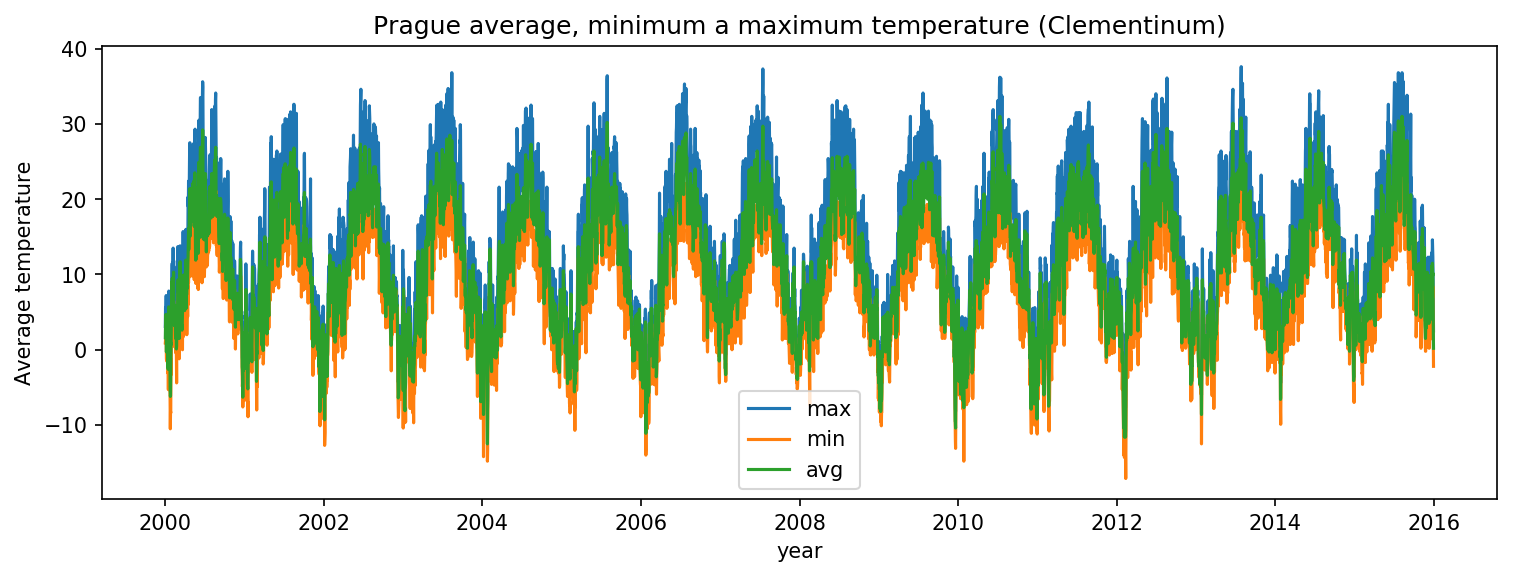

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(dt[sel], data[sel, 4], label='max')
ax.plot(dt[sel], data[sel, 5], label='min')
ax.plot(dt[sel], data[sel, 3], label='avg')
ax.axis('tight')
ax.set_title('Prague average, minimum a maximum temperature (Clementinum)')
ax.set_xlabel('year')
ax.set_ylabel('Average temperature')
ax.legend(loc='lower center');

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [27]:
n = array([0,1,2,3,4,5])

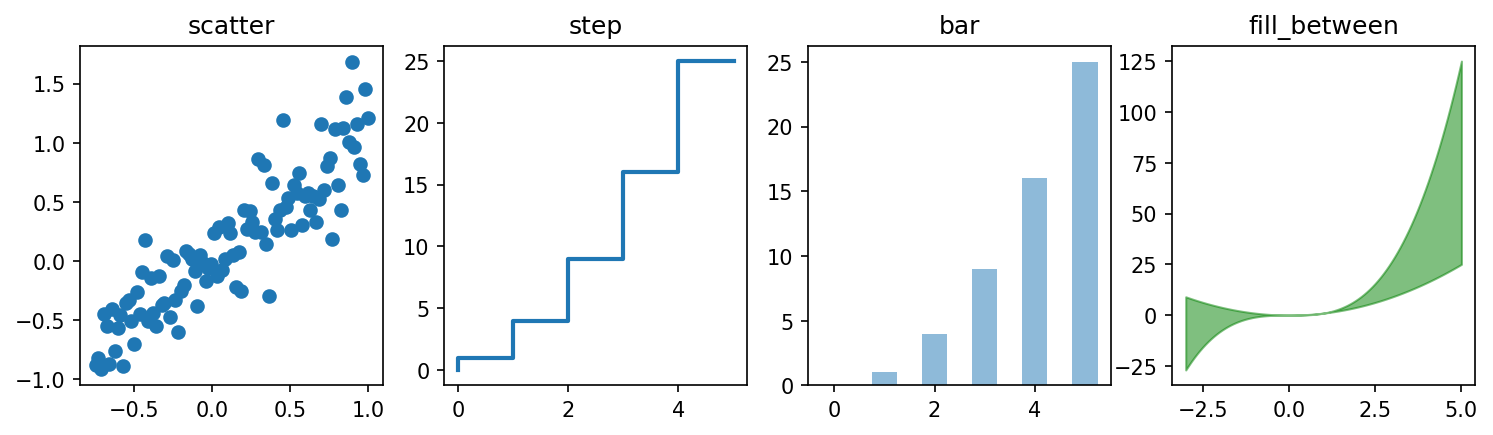

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

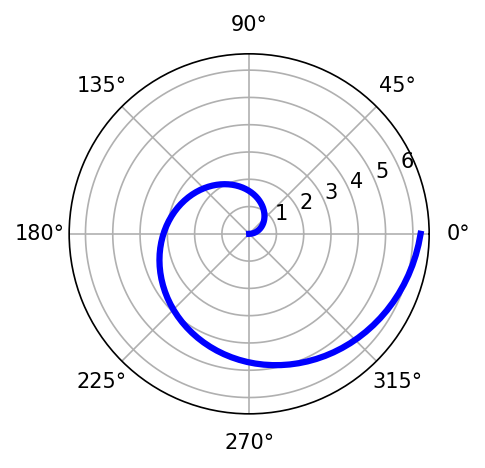

In [29]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = linspace(0, 2*pi, 100)
ax.plot(t, t, color='blue', lw=3);

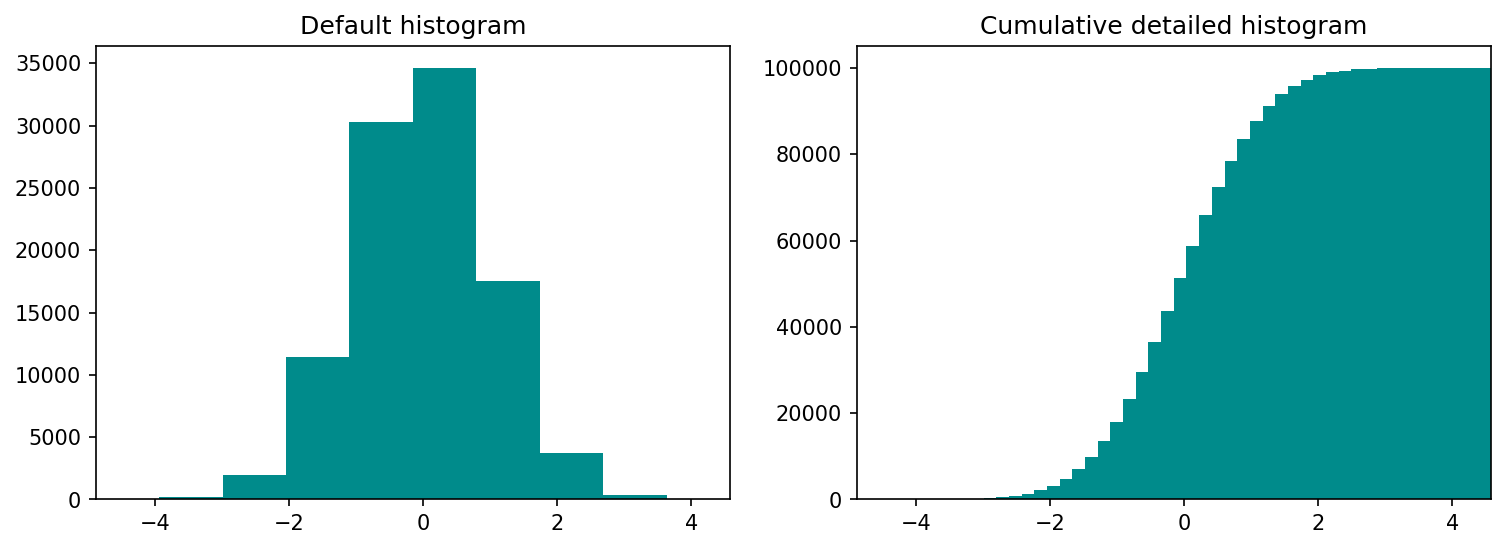

In [30]:
# A histogram
n = random.randn(100000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(n, color='darkcyan', lw=0.1)
ax1.set_title("Default histogram")
ax1.set_xlim((min(n), max(n)))

ax2.hist(n, cumulative=True, bins=50, color='darkcyan', lw=0.1)
ax2.set_title("Cumulative detailed histogram")
ax2.set_xlim((min(n), max(n)));

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

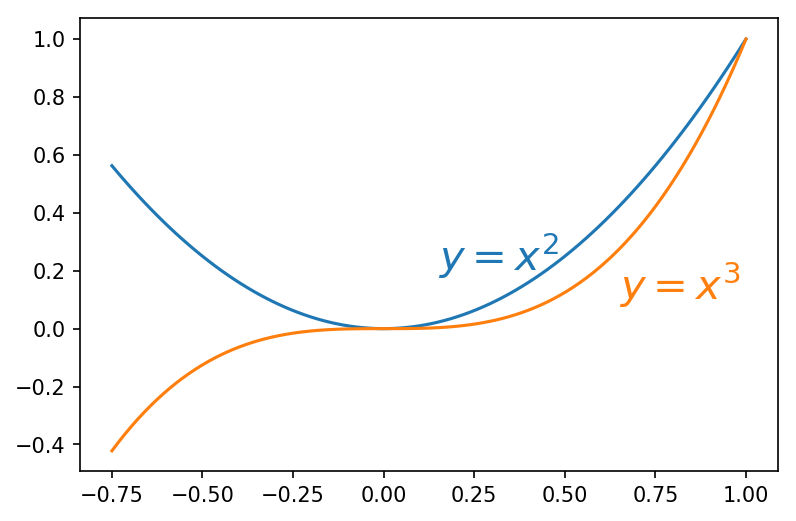

In [31]:
fig, ax = plt.subplots()

l1, l2 = ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color=l1.get_color())
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color=l2.get_color());

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

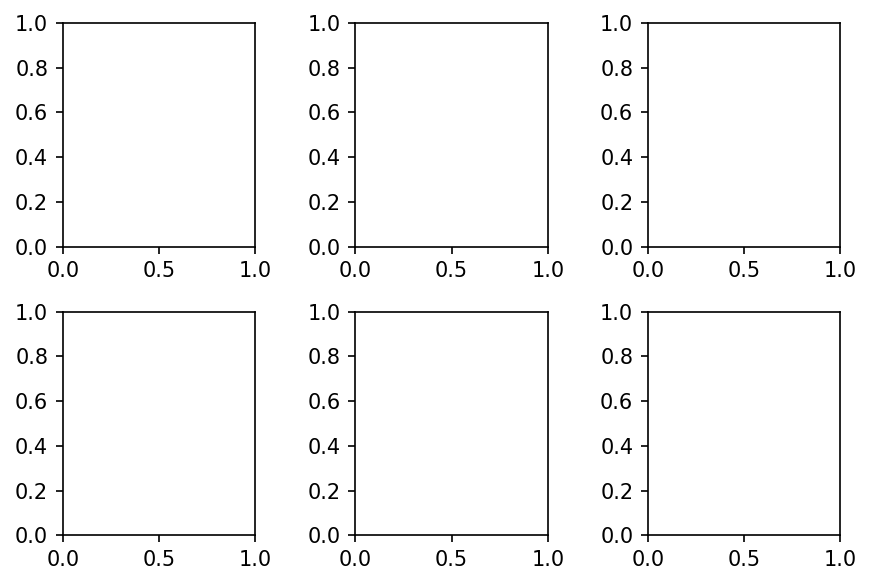

In [32]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

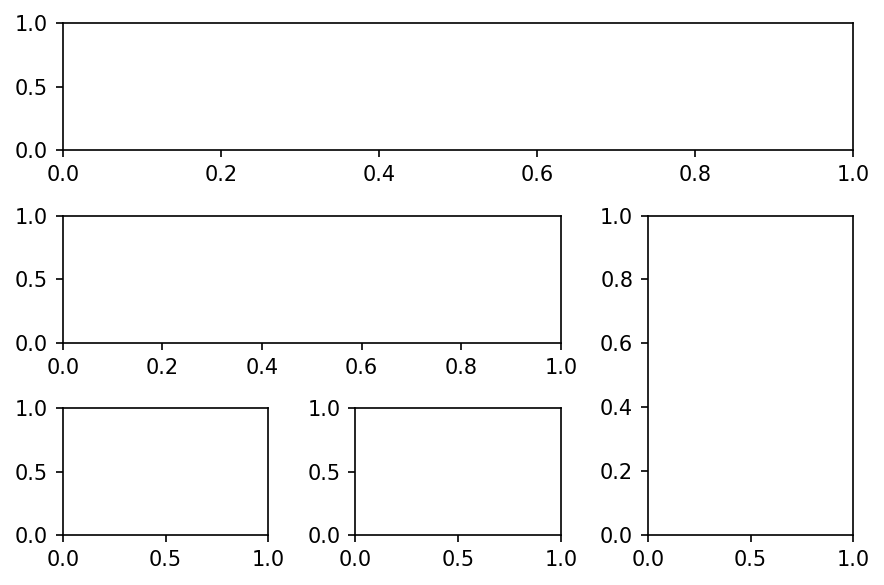

In [33]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [34]:
import matplotlib.gridspec as gridspec

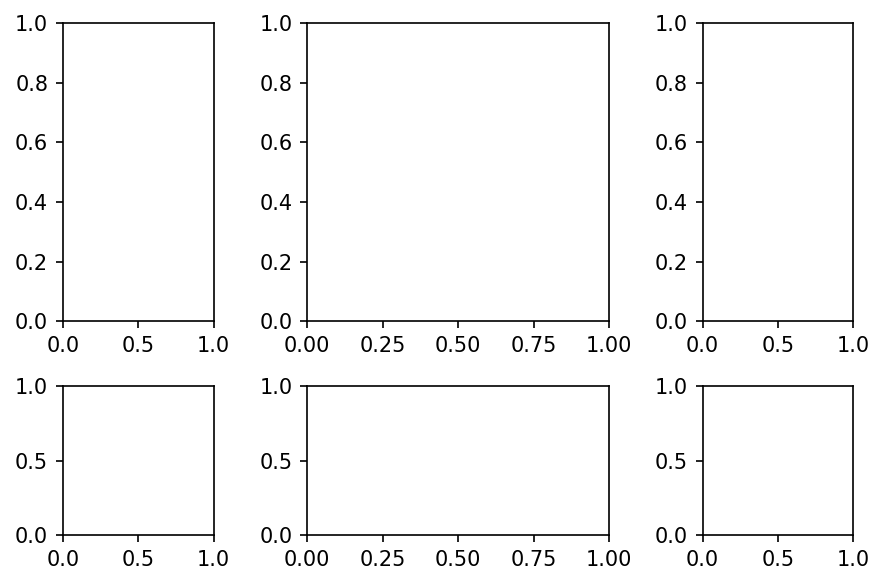

In [35]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

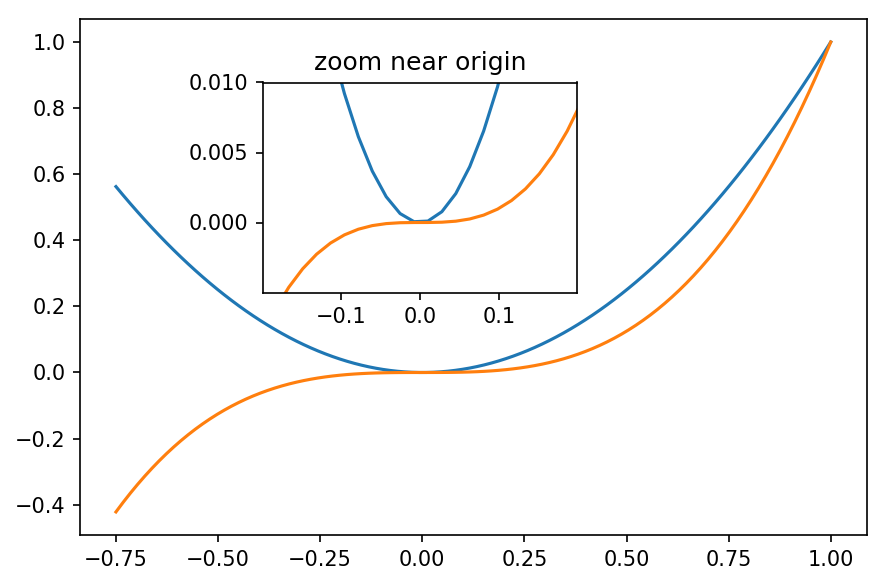

In [36]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.3, 0.5, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [37]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [38]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

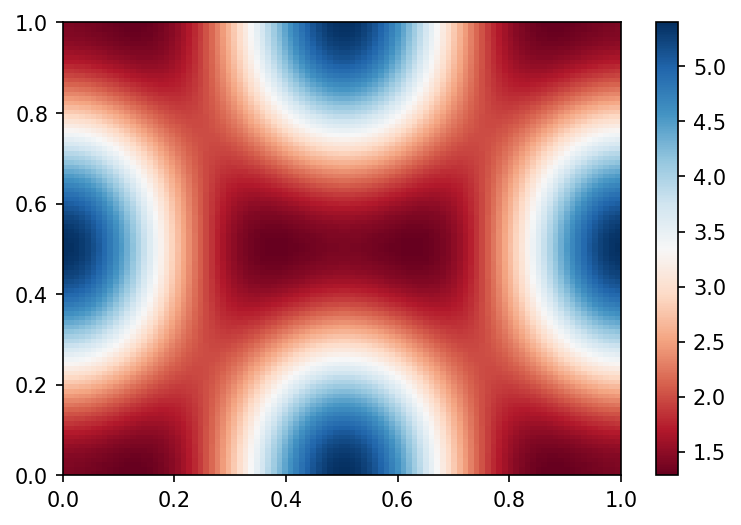

In [39]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

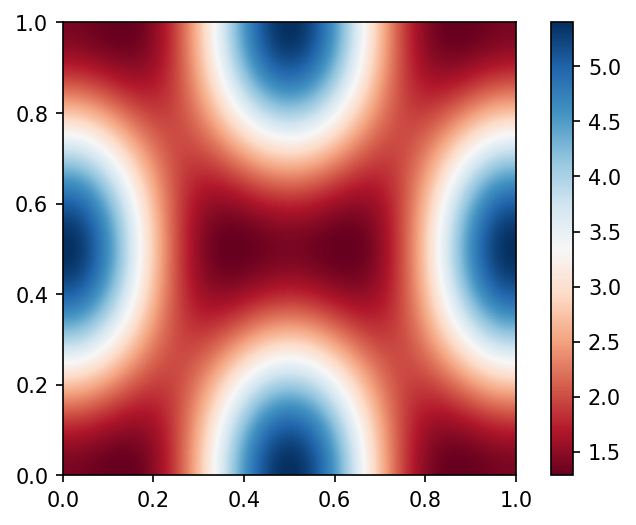

In [40]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

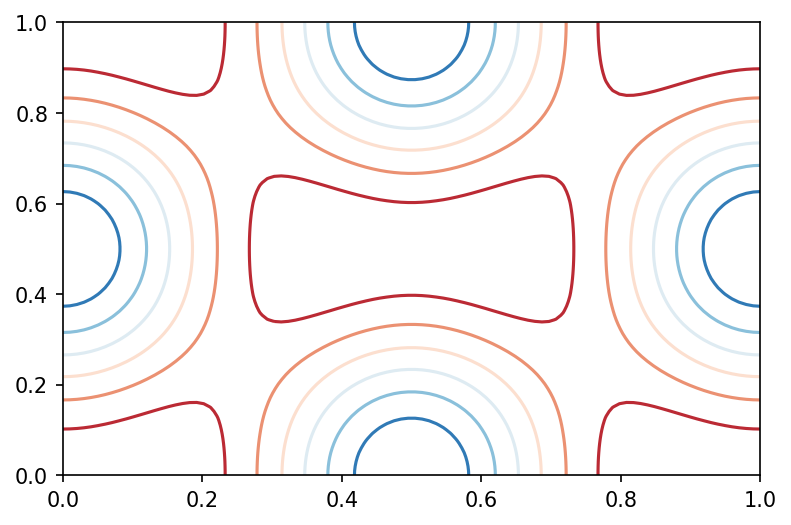

In [41]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [42]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

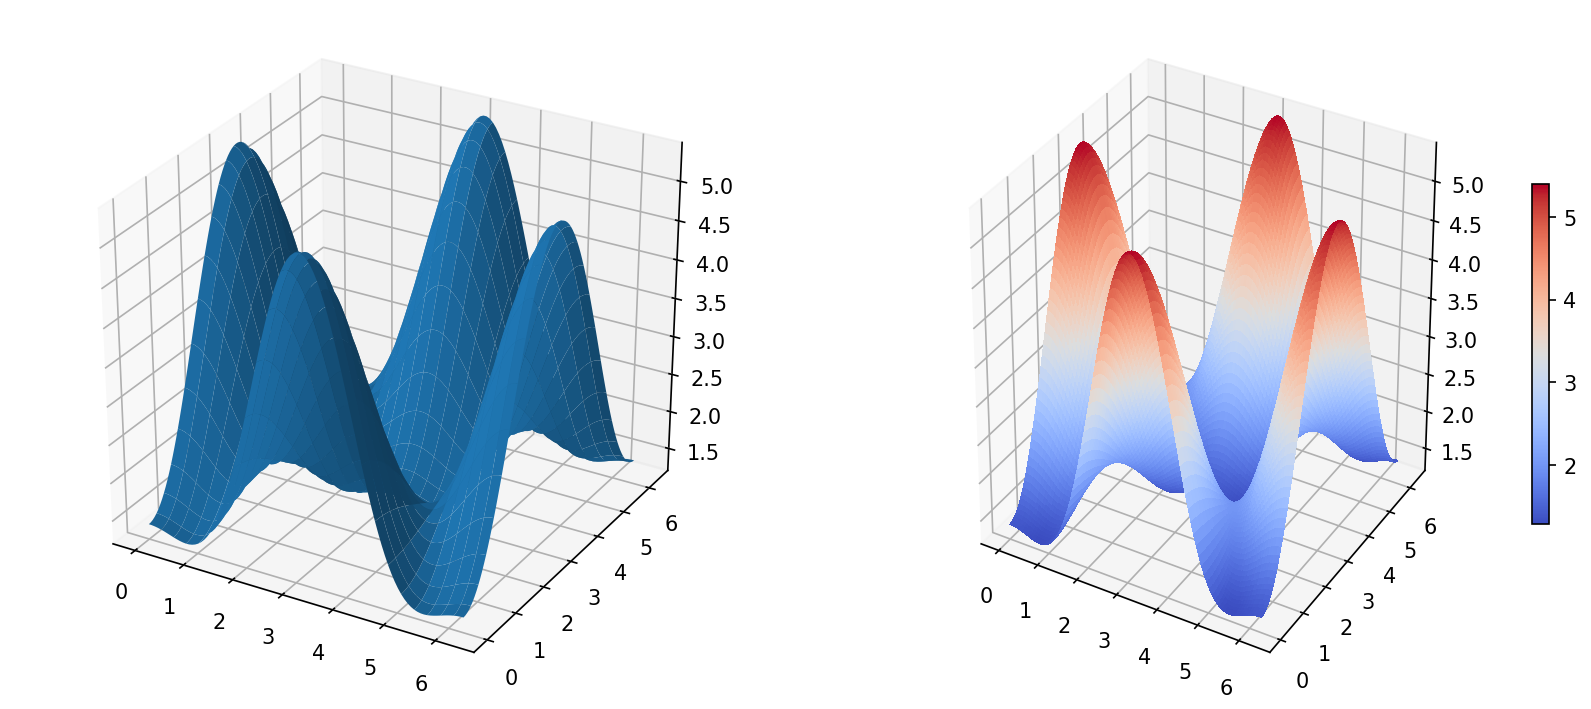

In [43]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

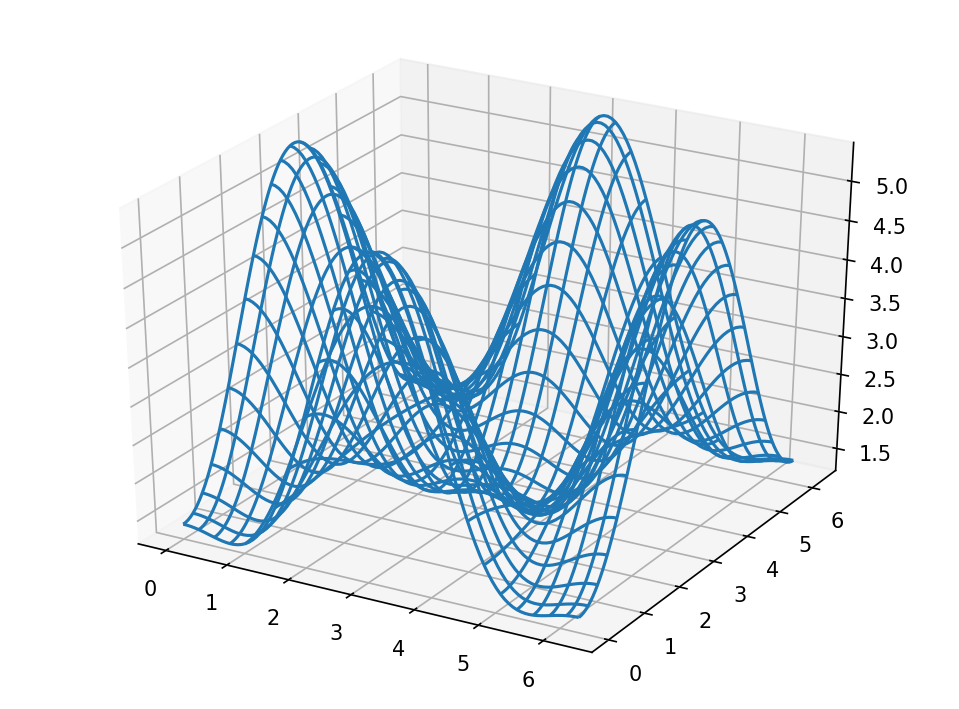

In [44]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

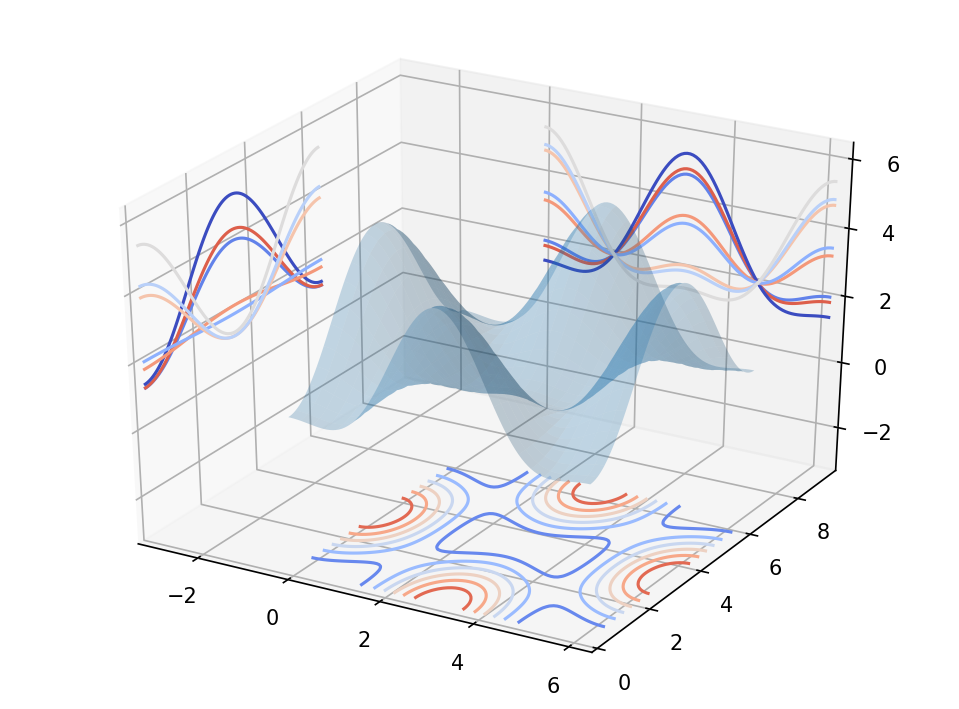

In [45]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Change the view angle

We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: `elevation` and `azimuth` angle (in degrees):

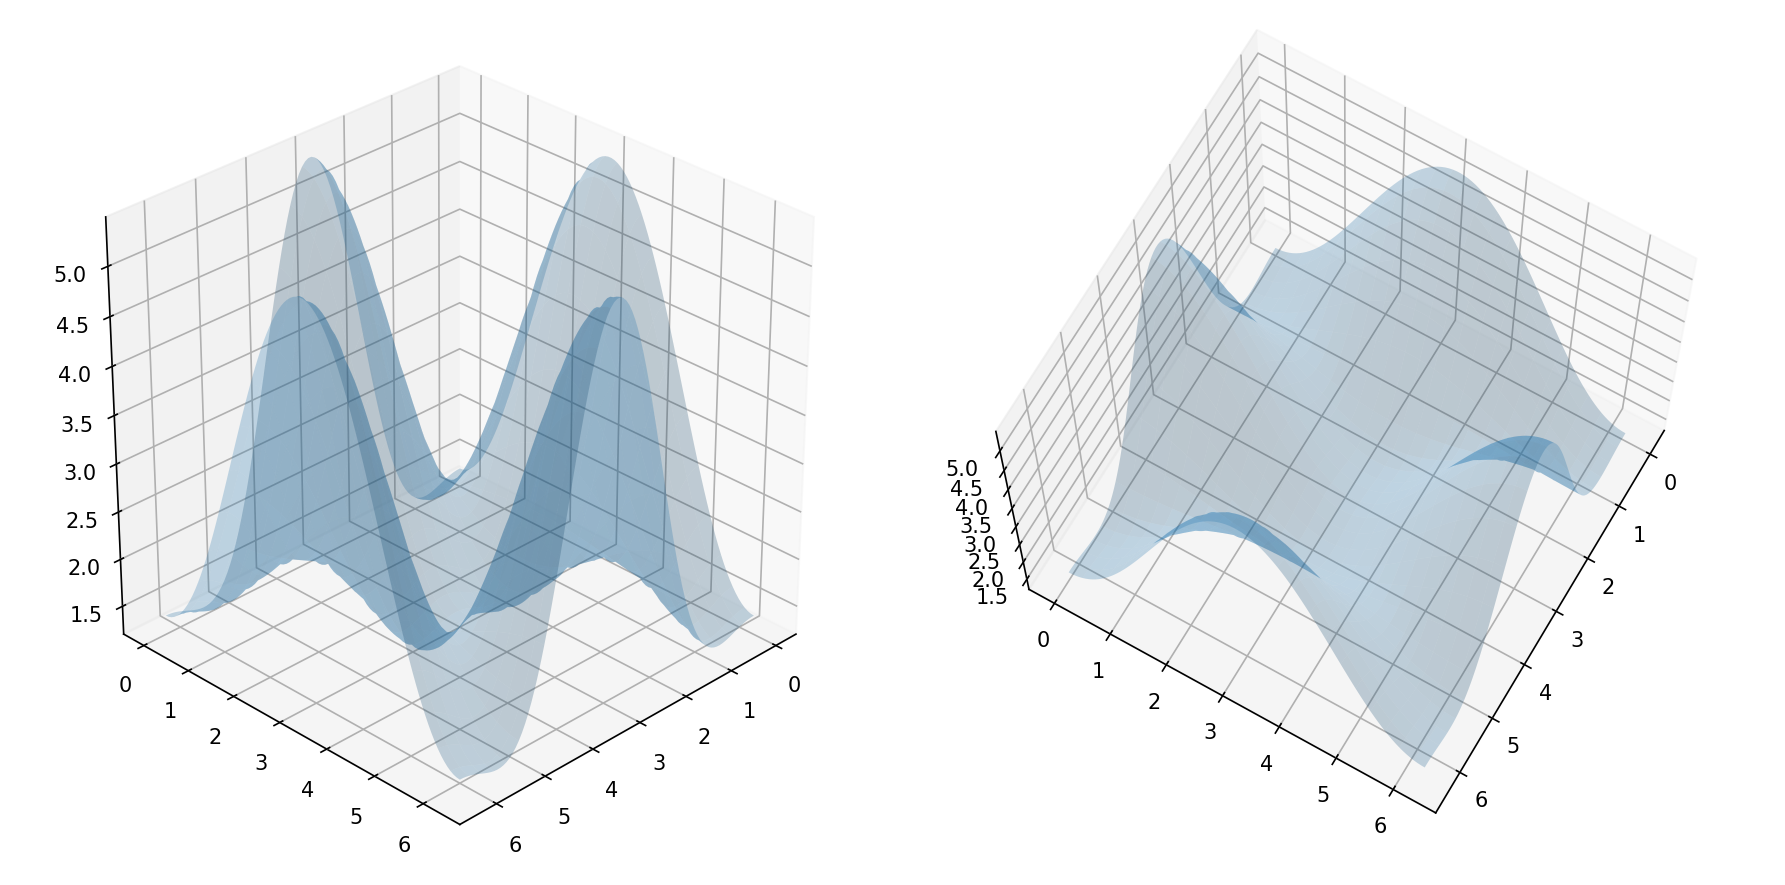

In [46]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## Bonus!

Matplotlib, good colormaps, and strong design principles were used in the recent LIGO paper!

![LIGO paper](https://pbs.twimg.com/media/Ca8jlVIWcAUmeP8.png:large)

In [47]:
!python scripts/footnote.py

Running using Python 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
Testing Python version-> py3.6 OK
Testing numpy...      -> numpy OK
Testing scipy ...     -> scipy OK
Testing matplotlib... -> pylab OK
Testing sympy         -> sympy OK
-----------------------------
All the IPython Notebooks in this lecture series are available at:
https://github.com/ondrolexa/r-python
